<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/learning_portfolio/1_skiing_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Portfolio 1 - Predict Prices in European Ski Resorts

<b>Goal:</b>

Predict the prices of skiing passes based on features of the ski resorts (e.g. number of slopes, altitude, country) using linear regression
<br>
<br>


<b>Source of data set:</b>

https://www.kaggle.com/datasets/thomasnibb/european-ski-resorts
<br>
<br>

<b>Description on Kaggle:</b>

Skiing in Europe is an experience unlike any other in the world. The mountain villages, history and traditions, cultural diversity from one valley to the next, plus of course the food and drink, mix wonderfully with the huge terrain, incredible lift systems and great (artificial) snow. Spending the night in an Italian mountain rifugio or an Austrian guesthouse dating from the 1500s add layers to European ski holidays that make it unforgettable. Once you ski Europe, you will definitely be back for more.

The number of ski resorts in Europe is massive, easily exceeding 1000. However, if you are looking for your next ski destination in Europe it is easy to get lost. Are you looking for the cheapest and best value for money ski resort? Or maybe just the biggest and most famous destinations with great lift connectivity and slopes? If you are like me, you might get overwhelmed when having to make decisions for your next holiday destination (ugh.. luxury problems). In such cases, I always like to go for a data driven approach, that will help me find an optimum solution.
Content

The ski resort data has been obtained from Ski-resort-stats.com as a snapshot in February 2022.
Acknowledgements

Thanks to Ski-resort-stats.com!

## Preparation

Import relevant libraries and mount Google drive

In [81]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/DigitalOrganizations/LearningPortfolio1/European_Ski_Resorts.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview

In [82]:
data.head()

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         376 non-null    int64 
 1   Resort             376 non-null    object
 2   Country            376 non-null    object
 3   HighestPoint       376 non-null    int64 
 4   LowestPoint        376 non-null    int64 
 5   DayPassPriceAdult  376 non-null    int64 
 6   BeginnerSlope      376 non-null    int64 
 7   IntermediateSlope  376 non-null    int64 
 8   DifficultSlope     376 non-null    int64 
 9   TotalSlope         376 non-null    int64 
 10  Snowparks          376 non-null    object
 11  NightSki           376 non-null    object
 12  SurfaceLifts       376 non-null    int64 
 13  ChairLifts         376 non-null    int64 
 14  GondolaLifts       376 non-null    int64 
 15  TotalLifts         376 non-null    int64 
 16  LiftCapacity       376 non-null    int64 
 1

Observations: 

- Mostly numerical data, except Resort, Country, Snowparks and NightSki
- There are only 376 rows in the data set, which is a bit low

In [84]:
data.describe()

,Unnamed: 0,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,188.500000,2051.688830,1055.098404,40.779255,35.869681,38.348404,11.776596,86.257979,13.662234,9.340426,3.954787,26.957447,34727.244681,218.361702
std,108.686092,776.719908,423.604310,12.474259,53.719832,49.691136,17.785780,113.740218,14.438661,12.595282,6.565411,31.038957,45955.042689,406.903529
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.750000,1550.000000,779.250000,34.000000,8.000000,9.000000,2.000000,25.000000,5.000000,2.000000,0.000000,10.000000,10642.500000,0.000000
50%,188.500000,2104.000000,1050.000000,42.000000,19.000000,22.000000,5.000000,48.000000,9.000000,5.000000,2.000000,17.000000,19031.500000,54.000000
75%,282.250000,2567.500000,1350.000000,49.000000,40.000000,42.250000,13.000000,100.000000,17.000000,10.000000,5.000000,29.250000,36555.500000,252.000000
max,376.000000,3899.000000,2180.000000,81.000000,312.000000,239.000000,103.000000,600.000000,89.000000,74.000000,40.000000,174.000000,252280.000000,2383.000000


## Descriptive Statistics

First do histograms for numerical data. The categorical features are plotted then separately with pie charts showing the number of occurrencies for each category.

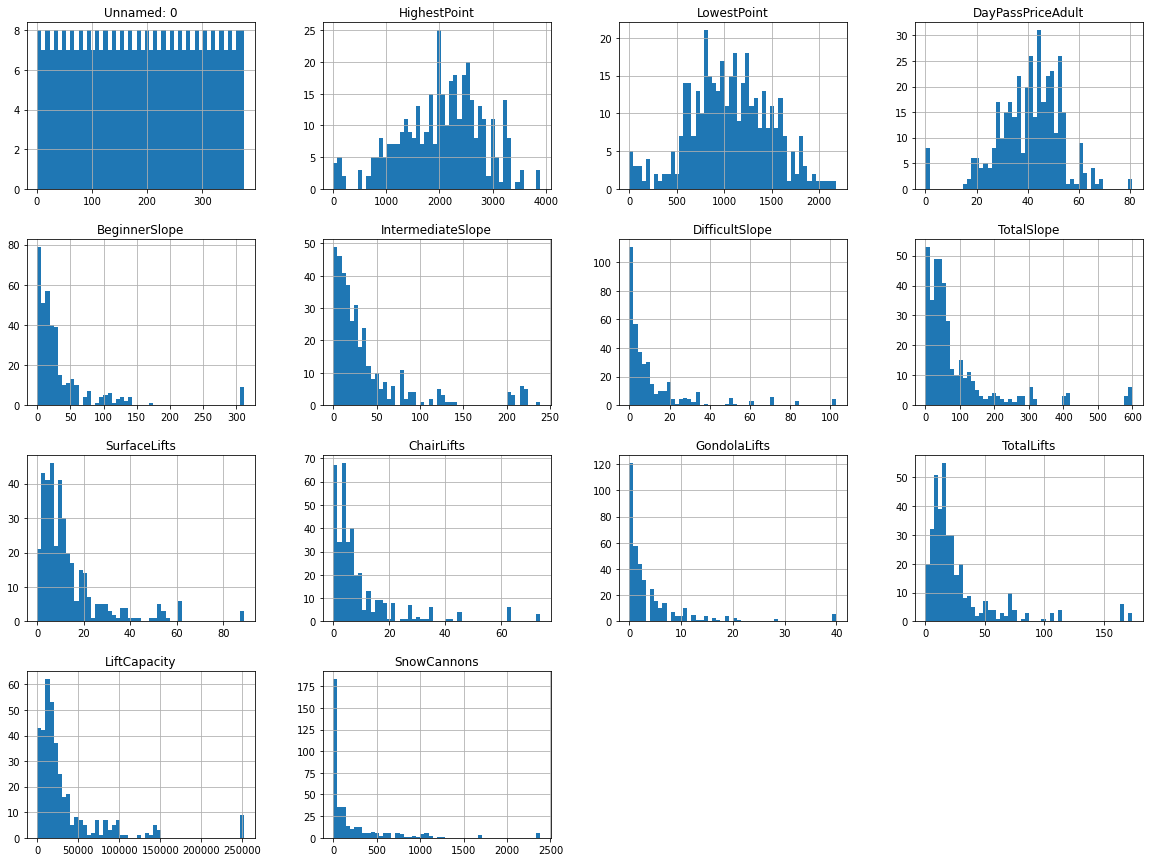

In [87]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: ylabel='Country'>

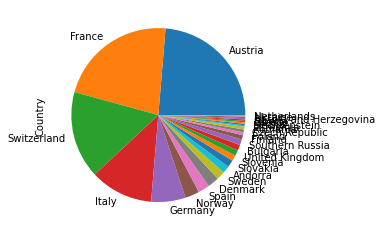

In [88]:
data['Country'].value_counts().plot.pie()

Observation: Austria, France and Switzerland alone account for more of skiing resorts in the dataset

<Axes: ylabel='NightSki'>

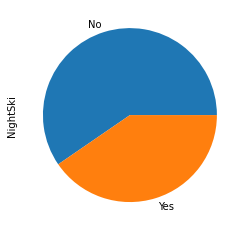

In [89]:
data['NightSki'].value_counts().plot.pie()

<Axes: ylabel='Snowparks'>

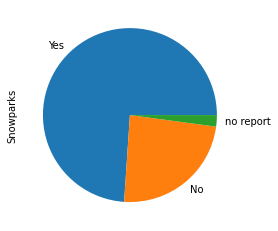

In [90]:
data['Snowparks'].value_counts().plot.pie()

## Correlations

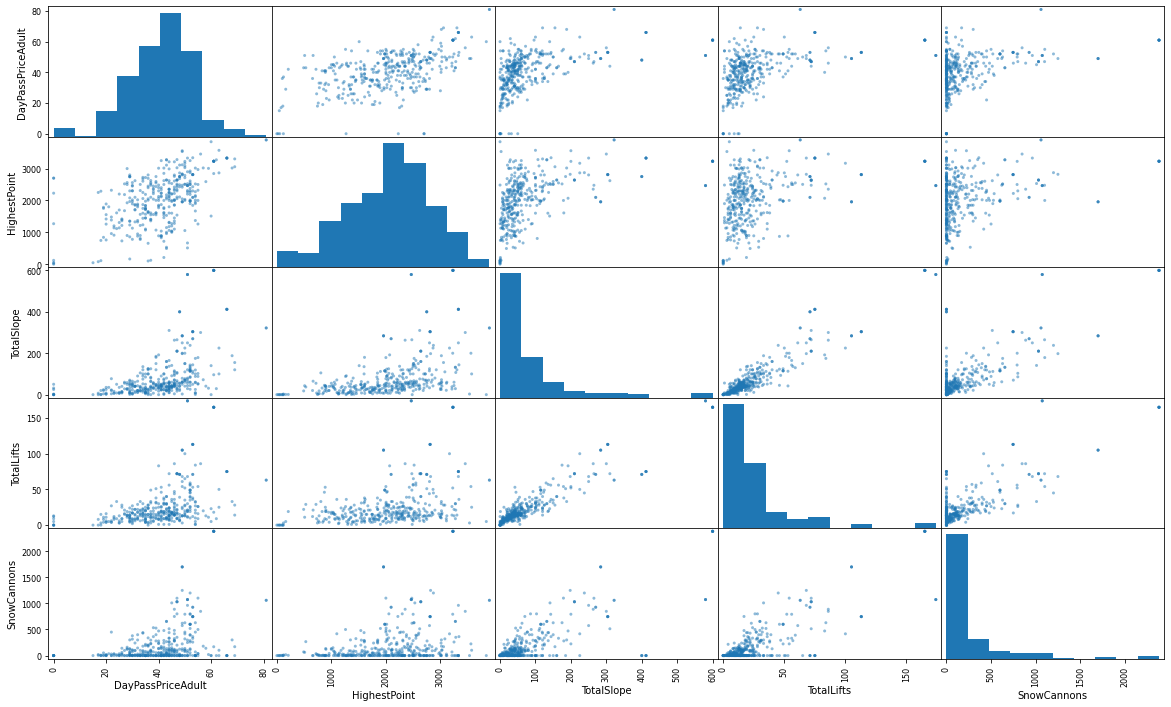

In [91]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['DayPassPriceAdult', 'HighestPoint', 'TotalSlope', 'TotalLifts', 'SnowCannons']], figsize=(20, 12))
plt.show()

In [92]:
corr_matrix = data.corr()
corr_matrix["DayPassPriceAdult"].sort_values(ascending=False)

DayPassPriceAdult    1.000000
IntermediateSlope    0.538994
HighestPoint         0.533034
GondolaLifts         0.526740
TotalSlope           0.509066
DifficultSlope       0.480167
TotalLifts           0.462889
LiftCapacity         0.462764
ChairLifts           0.431921
BeginnerSlope        0.421047
SnowCannons          0.391033
SurfaceLifts         0.378787
LowestPoint          0.202030
Unnamed: 0           0.178176
Name: DayPassPriceAdult, dtype: float64

Interpretations: There are clear positive correlations of the features with the price. The number of intermediate slopes, the altitude of the highest point and the number of gondola lifts show the highest positive correlations

## Cleaning and preparation of data

In [103]:
data[data['DayPassPriceAdult'] == 0]

,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
123,Italy,2700,1335,0,14,32,4,50,No,No,4,1,0,5,3660,0
131,Siberia,1270,670,0,0,0,0,0,No,No,3,5,4,12,19919,0
162,Southern Russia,2228,535,0,10,10,5,25,No,No,1,1,7,9,18120,0
217,Denmark,120,10,0,1,1,1,3,no report,No,0,0,0,0,0,0
218,Denmark,53,50,0,0,0,0,0,no report,No,0,0,0,0,0,0
219,Denmark,23,20,0,0,0,0,0,no report,No,0,0,0,0,0,0
220,Denmark,0,0,0,0,0,0,0,no report,No,0,0,0,0,0,0
255,France,2700,1830,0,9,15,7,32,No,No,11,2,0,13,11865,0


Is it plausible that there are Resorts that are free? -> For now I leave them in the data set

There should be no skiing resort where the lowest point is higher than the highest point

In [ ]:
data[data['HighestPoint']<data['LowestPoint']]

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons


Are there na-values?

In [ ]:
data.isna().sum()
#No, there are none

Unnamed: 0           0
Resort               0
Country              0
HighestPoint         0
LowestPoint          0
DayPassPriceAdult    0
BeginnerSlope        0
IntermediateSlope    0
DifficultSlope       0
TotalSlope           0
Snowparks            0
NightSki             0
SurfaceLifts         0
ChairLifts           0
GondolaLifts         0
TotalLifts           0
LiftCapacity         0
SnowCannons          0
dtype: int64

Remove index column 'Unnamed: 0' and 'Resort' because they clearly have no value for further analysis

In [93]:
data = data.drop(['Unnamed: 0', 'Resort'], axis=1)

In [94]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [95]:
train_label = train_set[["DayPassPriceAdult"]].copy()
train_set = train_set.drop("DayPassPriceAdult", axis=1)

OneHotEncoder and Scaling

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(
    transformers = [
      ('categorical', make_pipeline(OneHotEncoder(handle_unknown="ignore")), ['Country', 'Snowparks', 'NightSki']),
      ('normal', make_pipeline(StandardScaler()), ['IntermediateSlope', 'HighestPoint', 'GondolaLifts', 'TotalSlope', 'DifficultSlope', 'SnowCannons', 'SurfaceLifts', 'LowestPoint'])
], remainder='passthrough')

transformed_data = transformer.fit_transform(train_set)
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())
transformed_df.head()


,categorical__Country_Andorra,categorical__Country_Austria,categorical__Country_Bosnia and Herzegovina,categorical__Country_Bulgaria,categorical__Country_Czech Republic,categorical__Country_Denmark,categorical__Country_Finland,categorical__Country_France,categorical__Country_Germany,categorical__Country_Greece,...,normal__GondolaLifts,normal__TotalSlope,normal__DifficultSlope,normal__SnowCannons,normal__SurfaceLifts,normal__LowestPoint,remainder__BeginnerSlope,remainder__ChairLifts,remainder__TotalLifts,remainder__LiftCapacity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.615067,-0.289850,-0.334424,0.199847,0.004645,0.010942,30.0,13.0,27.0,35052.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.615067,-0.755166,-0.660869,-0.546234,-0.924420,-2.533252,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.857559,0.200848,-0.225610,0.235375,0.734626,-0.864928,60.0,18.0,53.0,67472.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.467804,-0.569040,-0.552054,-0.411229,-0.592611,-0.595052,10.0,2.0,8.0,9048.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.026016,-0.205247,0.264057,-0.546234,-0.327164,-1.539617,10.0,8.0,21.0,30867.0


## Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(transformed_df, train_label)

#make preditions (still on training data) 
data_predictions = lin_reg.predict(transformed_df)

In [102]:
data_predictions[:5]

array([[29.99938101],
       [ 9.92922133],
       [51.60619426],
       [37.95322216],
       [49.04698139]])

In [101]:
train_label.iloc[:5].values

array([[30],
       [ 0],
       [53],
       [41],
       [51]])

Prediction looks good so far